<a href="https://colab.research.google.com/github/KaiwenYangUT/JSC270_Lab7/blob/main/JSC270_2023_Lab7_NLP_Intro_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JSC270 Lab 7: Intro to Natural Language Processing


## Some announcements before we start:
- The code (jupyter notebook) from Alastair Johnson's lecture on Monday has been posted to the class website. The notebook generates his slides.

- Assignment 3 is due on Friday at 10:59am.

- The first part of Assignment 4 is to find a group member. Please do so and sign up on this sheet.

## 1. Working with Strings in Python

- In python (and most other programming languages), we represent text using __strings__, which are just sequences of characters stored as arrays
- You can assign a string object in python using single or double quotes
- Triple quotes can be used for a multiline strings
- Strings can be concatenated (added together) with the '+' symbol

In [ ]:
string1 = 'This is how we store text'
string2 = "We could store text like this too, with double quotes"
string3 = '''I'm a multiline string. This is very useful for representing 
larger volumes of text, like paragraphs of a book.'''


print(string1 + '\n', string2 + '\n', string3)
print(string1 + '. ' + string2)

This is how we store text
 We could store text like this too, with double quotes
 I'm a multiline string. This is very useful for representing 
larger volumes of text, like paragraphs of a book.
This is how we store text. We could store text like this too, with double quotes


- Because python strings are represented as arrays, we can also iterate and slice them, just like with a regular array (i.e. a list)
- Since strings are represented with quotation marks, if we ever want quotes within the string itself, we need to use the backslash (called the escape character)

In [ ]:
# print the first 5 characters of string 3
print(string3[:5])

# Iterate through the first 4 characters of string 1
for i in range(5):
  print(string1[i])

# Create a string with quotation marks
quote_string = 'This string \'actually\' has quotation marks in it'
print(quote_string)

I'm a
T
h
i
s
 
This string 'actually' has quotation marks in it


- Note that in the printout, the 5th element of `string1` was printed. It just happened to be whitespace, which is treated as its character. This is an important detail - hidden whitespace can make it difficult for you to clean text data.

- Python also has a set of methods designed for you to modify existing strings:

In [ ]:
a = 'THIS STRING IS ALL CAPITAL LETTERS'
b = 'this string has all lowercase letters'
c = '     This string has extra whitespace   '
d = 'This string has exactly zne misspelling'

# Convert a to lowercase
print('Convert a to lowercase:',a.lower())

# Convert b into capitals
print('Convert b to capitals:', b.upper())

# Remove excess whitespace from beginning and end of string
print('Take the whitespace off the beg and end of c:', c.strip())

# Replace characters as needed
print('Fix the typo in d:',d.replace('z','o'))

Convert a to lowercase: this string is all capital letters
Convert b to capitals: THIS STRING HAS ALL LOWERCASE LETTERS
Take the whitespace off the beg and end of c: This string has extra whitespace
Fix the typo in d: This string has exactly one misspelling


- Some of these methods can accept as inputs strings longer than one character
- Just be careful: Methods act over the entire string, so you may modify parts of text you didn't expect
- You can also chain these methods together to create a small pipeline

In [ ]:
d.replace('z','o').replace('one', 'zero').replace('misspelling','misspellings')

'This string has exactly zero misspellings'

- We can use the `split` method to split a string of running text into a list of words. By default, it separates by whitespace. But you can give a different delimiter.

In [ ]:
s = 'This is a list of words we might want to separate.'

# Separate string s into a list of words
s.split()

['This',
 'is',
 'a',
 'list',
 'of',
 'words',
 'we',
 'might',
 'want',
 'to',
 'separate.']

Notice that we did not remove the punctuation. We'll look at how to do that shortly.
- There are many other useful methods not covered here (Google is your friend here)

<br>

<br>

__Q: Based on what you've just seen, how might we remove the punctuation?__ There's more than one right answer here.

In [ ]:
## Answer
s = s.replace('.','')

## 2. Pattern Identification with Regular Expressions

- What if we didn't create the string, but we wanted to find it based on a specific pattern it might contain?

- __Regular Expressions__, or regex for short, are sequences of characters designed to specify search patterns. They can be used to find strings containing specific patterns, or to replace specific parts of a string. These patterns are defined at the character level.

- Regex uses certain metacharacters to span larger string patterns with short syntax. For example:
    - `[a-q]` is used to denote any (lowercase) letter between a and q
    - `\w` is used to denote any alphanumeric character (any number or letter)

- Virtually every programming language has some sort of regex implementation. We'll use python's `re` package


In [ ]:
import re

# Let's define some strings, representing what we might see text

a = 'half a league, half a league, half a league onward!'
b = 'John Smith, Toronto, Canada, L2G0C8'
c = 'assignment1.csv, assignment2.txt, assignment3.pdf'
d = 'The review committee for 2018 approved a travel budget of $2800'

We can use regex to identify (and possibly remove) certain parts of these strings. The following are commonly used patterns:
- `[A-Zz-z]` denotes all letters (capital and lowercase)
- `[0-5][5-9]` denotes any 2 digit number between 05 and 59
- `[abcd]` denotes a or b or c or d (but only one of them) 
- `[^def]` denotes any character that is not d or e or f
- `.` The period is a wildcard - denotes any character
- `\w` denotes any alphanumeric character
- `\s` denotes whitespace
- `\S` denotes any non-whitespace character

Using the strings defined above, let's try and find/extract information:

In [ ]:
#### How often does the phrase 'Half a league' occur in a? ####
result = re.findall('[Hh]alf a league', a)
print(result)

# This function returns a list of all the matches for my search (Note the regex used)
print('The phrase \'half a league\' occurs {} times in a'.format(len(result)))

['half a league', 'half a league', 'half a league']
The phrase 'half a league' occurs 3 times in a


In [ ]:
#### What types of files are contained in c? #####
result = re.findall('\.([a-z]{3})', c)
print(result)

['csv', 'txt', 'pdf']


For that last example, notice:
- Since the `.` is a wildcard character by default, if I actually want to look for a period, I need to use the backslash (escape character) to denote it
- The `{}` are used as shorthand to repeat a character within the search pattern (in this case I was look for three digits in a row).
- The `()` form what's called a __capture group__. This is used to separate the pattern I searched for from the information I actually need. In this case, the period is necessary to find the file formats, but I don't actually want it returned with the other three digits, so I exclude it from the capture group.

In [ ]:
#### Is the budget in d for 2018 greater than $1000?
budget = re.findall('\$([0-9]+)',d)

print(budget)
print( (float(budget[0]) > 1000) )

['2800']
True


Note the `+`, which is called the Kleene Plus. It is used to indicate '1 or more' of some character. The `*` is called the Kleene star, and is used to specify 'zero or more'. With both of these symbols, there is no upper limit (ie `[0-9]+` could potentially capture a string of 10000 digits if that exists).

In [ ]:
#### Replace the year and budget in d with 2019 and $30000 ####
print('Original string:\n', d)
new_budget = re.sub('\$[0-9]+','$30000', d)
print('Changed budget:\n',new_budget)

new_year = re.sub('\s\d+\s', ' 2019 ', new_budget)
print('Both changes:\n',new_year)

Original string:
 The review committee for 2018 approved a travel budget of $2800
Changed budget:
 The review committee for 2018 approved a travel budget of $30000
Both changes:
 The review committee for 2019 approved a travel budget of $30000


Remember that `\s` denotes whitespace. `\d` is short notation for any digit `[0-9]`. The regex for new year can be read as "[Whitespace][One or more digits][Whitespace]".

<br>

<br>

__Q: What would happen in the above example if I didn't include the whitespace indicators in my regular expression?__ 

In [ ]:
# Answer
new_year = re.sub('[0-9]{4}', '2019', new_budget)
print('Both changes:\n',new_year)

Both changes:
 The review committee for 2019 approved a travel budget of $20190


<br> 

<br>

In [ ]:
#### Extract the name and Postal code from b ####
print(b)

# There may be ways to do this
post_code = re.search('[A-Z]\d[A-Z]\s?\d[A-Z]\d', b)
print('Postal Code:', post_code.group())

# Names will almost always start with capital letters
# Also, there will be two of them consecutively

name = re.search('[A-Z][a-z]+\s+[A-Z][a-z]+', b)
print('Name:', name.group())

John Smith, Toronto, Canada, L2G0C8
Postal Code: L2G0C8
Name: John Smith


Notice for the regex in the postal code extraction, I simply followed the pattern of a postal code (letter, number, letter, ...). The `?` symbol makes the preceding character optional. Since some postal codes contain spaces, this search pattern is now robust to that possibility.

<br>

<br>

__Q: What would be the regular expression for extracting Twitter handles?(e.g. @xyz)__. 

In [ ]:
# Answer
'@\w+'

'@\\w+'

- The ones we've seen today are just a small portion of the whole language. I encourage you to read further into them, since you will likely use them in later courses.
- __Regexone__ hosts a great sequence of tutorials on regular expressions, which you can visit [here](https://regexone.com/).


<br>

<br>

## 3. Today's Dataset 

- Today we'll be doing binary classification (spam detection) with email messages. Our dataset is a subsample of a larger set that comes from the Machine Learning Repository at UC Irvine. This particular data (as is often the case) was used for a Kaggle competition, which you can read about [here](https://www.kaggle.com/uciml/sms-spam-collection-dataset/tasks). 

- The dataset contains 5572 observations, with the message itself, and the label (spam/ham). The file `spam.csv` is listed alongside the link to this notebook. 

<br>

__Go ahead and download the dataset from [here](https://drive.google.com/file/d/10vSo6HaJDVqCgti07q87KkpCMYzdJf6v/view?usp=sharing). You can load it into this notebook using the code below__. 

In [ ]:
# Read in data from github 
!wget "https://raw.githubusercontent.com/jlgrons/JSC270_Lab7/master/spam.csv"

--2022-03-06 21:52:10--  https://raw.githubusercontent.com/jlgrons/JSC270_Lab7/master/spam.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/plain]
Saving to: ‘spam.csv.3’

spam.csv.3          100%[===================>] 491.86K  --.-KB/s    in 0.03s   

2022-03-06 21:52:10 (16.9 MB/s) - ‘spam.csv.3’ saved [503663/503663]



In [ ]:
import pandas as pd 
df = pd.read_csv(r"/content/spam.csv", encoding= 'latin1')

In [ ]:
# You'll know you were successful if this code works
import numpy as np

print(df.head(5))

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


- Note the `encoding` argument passed to the `read_csv` method. CSV files can often be encoded in a number of different ways. The standard is `encoding = 'utf-8'`, however there are other systems, like `'latin1'`.

You can run the following code to get an idea of what we're dealing with:

In [ ]:
# This function will print a random email message
def print_random_message():
  i = np.random.randint(len(df))
  message = df.iloc[i,1]
  label = df.iloc[i,0]
  print('Here is one of the messages:\n', message)
  print('It is labelled as:\n',label)

# call the function
print_random_message()

Here is one of the messages:
 Que pases un buen tiempo or something like that
It is labelled as:
 ham


Before we do anything with the text itself, the df needs a bit of tidying. The default parser gave us some extra columns:

In [ ]:
# How many columns are there now?
print('The columns read in are:',list(df))

# The datset should only contain {label, message}
data = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
# rename other columns while we're at it
data.columns = ['label', 'message']
print('Now we keep just what we need:\n', data.head())

The columns read in are: ['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
Now we keep just what we need:
   label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


The last thing I'm going to do before we look at the text is change the labels to numeric (1 = spam). Remember, in binary classification we usually want to make the minority outcome the positive class, since it is usually what we're interested in. While I'm at it, let's examine the balance between the classes. 

In [ ]:
# Change spam = 1, ham = 0
data.label = (data.label == 'spam').astype(float)

print(data.head(5),'\n\n')

# Compute proportion of spam observations
spam_proportion = round(data.label.sum()/len(data), 2)
print('Spam labels make up approximately {} percent of the dataset'.format(spam_proportion))

   label                                            message
0    0.0  Go until jurong point, crazy.. Available only ...
1    0.0                      Ok lar... Joking wif u oni...
2    1.0  Free entry in 2 a wkly comp to win FA Cup fina...
3    0.0  U dun say so early hor... U c already then say...
4    0.0  Nah I don't think he goes to usf, he lives aro... 


Spam labels make up approximately 0.13 percent of the dataset


So we have about an 87/13 split, which is very imbalanced. Keep this in mind later, when we fit a classifier and evaluate its performance. Let's see an example of each type of message:

In [ ]:
np.random.seed(16)
print_random_message()
print_random_message()

Here is one of the messages:
 Shop till u Drop, IS IT YOU, either 10K, 5K, å£500 Cash or å£100 Travel voucher, Call now, 09064011000. NTT PO Box CR01327BT fixedline Cost 150ppm mobile vary
It is labelled as:
 spam
Here is one of the messages:
 Ok anyway no need to change with what you said
It is labelled as:
 ham


<br>

<br>

__Q: Looking at the two messages above, and using your own intuition, what characteristics do you think SPAM emails have that HAM emails do not?__ 

<br>

In [ ]:
# Answer

## 4. Tokenization and Cleaning

<br>

- In terms of predictive power, using an entire sentence (or series of sentences) is not very effective. Most of the words won't matter for predicting spam, but certain groups of characters can be very important. First, some terminology: 

- In NLP, we call a single observation of text a __document__. In this case, our documents are emails, but they could be tweets, patents, cheques, web pages, etc...

- A collection of documents (ie an entire text dataset) is called a __corpus__. There are many publically available corpora online, if you ever want to build your own models

- We are interesting in splitting the documents into useful, informative units called __tokens__. Tokens are often just words, but they don't have to be. For instance, the token `'t`, when present to the right of the word `can`, will completely change the meaning of a sentence. The process of converting raw text into tokens is called __tokenization__.

<br>

There are a handful of great python libraries designed specifically for processing text. The one we'll use today is called `nltk`, which stands for Natural Language Tool Kit. 
- The first thing we'll want to do is tokenize the documents in our corpus:

In [ ]:
import nltk
# Download the tokenizer
nltk.download('punkt')

# Create a new column in our DF that contains token lists instead of raw text
data['tokens'] = data['message'].apply(nltk.word_tokenize)

print(data['tokens'].head(5))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
0    [Go, until, jurong, point, ,, crazy.., Availab...
1             [Ok, lar, ..., Joking, wif, u, oni, ...]
2    [Free, entry, in, 2, a, wkly, comp, to, win, F...
3    [U, dun, say, so, early, hor, ..., U, c, alrea...
4    [Nah, I, do, n't, think, he, goes, to, usf, ,,...
Name: tokens, dtype: object


Notice the 5th row of our printout: nltk's word tokenizer has automatically recognized that `n't` should be its own token. This would by very difficult to do by hand.

- Another step we might want to take is to convert all our tokens into lowercase. This prevents a word at the beginning of a sentence from being treated as a separate token from other occurrences later in sentences.

In [ ]:
##### Convert tokens into lowercase ####
lowercase_tokens = []
# Create a list of lists with what we want
for row in data['tokens']:
  lowercase_tokens.append([t.lower() for t in row])
# add the new info to our df
data['lowercase_tokens'] = lowercase_tokens

print(data['lowercase_tokens'].head(5))

0    [go, until, jurong, point, ,, crazy.., availab...
1             [ok, lar, ..., joking, wif, u, oni, ...]
2    [free, entry, in, 2, a, wkly, comp, to, win, f...
3    [u, dun, say, so, early, hor, ..., u, c, alrea...
4    [nah, i, do, n't, think, he, goes, to, usf, ,,...
Name: lowercase_tokens, dtype: object


Now all tokens are lowercase. We could have also done these last two steps in opposite order, converting raw strings to lowercase and then tokenizing.

<br>

- Another thing we might want to do is remove punctuation. Again, since some tokens may have punctuation marks attached, this might prevent otherwise identical words from being treated as identical. We can use the regex functions to help here. Instead of listing all forms of punctuation (some of which, like `.` or `?`, would require the escape character), we can be a bit more clever, and remove all punctuation and special characters at once.
- Remember that `\w` is used to denote any alphanumeric character (it also allows underscores) and `\s` denotes whitespace

In [ ]:
##### Let's remove punctuation #####

# Note we've been keeping different columns for different steps (not necessary)
list(data)

# Same process as before
tokens_no_punct = []
# Create a list of lists with what we want
for row in data['lowercase_tokens']:
  tokens_no_punct.append([re.sub('[^\w\s]','', t) for t in row])
# add the new info to our df
data['tokens_no_punct'] = tokens_no_punct

print(data['tokens_no_punct'].head(5))


0    [go, until, jurong, point, , crazy, available,...
1                   [ok, lar, , joking, wif, u, oni, ]
2    [free, entry, in, 2, a, wkly, comp, to, win, f...
3    [u, dun, say, so, early, hor, , u, c, already,...
4    [nah, i, do, nt, think, he, goes, to, usf, , h...
Name: tokens_no_punct, dtype: object


The carat symbol `^` is used for negation, so the regex in the above process is read as: 'Remove all characters that are not alphanumeric or whitespace'. We do this for every token in the list, and for each token list in our DF.

- Be careful when removing all special characters. Sometimes certain symbols can have important meaning, and you dont' want them removed. In that case, your search pattern will have to be a bit more refined.

<br>

<br>

__Q: Can you think of an example where we might want to keep a certain special character?__ 

In [ ]:
# Answer

<br>

<br>

Another common step is to remove words that we know will be in almost every document. These are called __stopwords__, and because they are used so often, they won't have any predictive power in most models (there are some rare exceptions, but they do not apply here). To avoid adding unnecessary noise, we can remove such words. `nltk` provides a list of almost 200 such words:

In [ ]:
##### Time to remove Stopwords #####

from nltk.corpus import stopwords
nltk.download('stopwords')
# print the top 75 most popular english words
sw = stopwords.words('english')[:75]

# I converted to np array for better printing
print(np.array(sw).reshape((15,5)))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[['i' 'me' 'my' 'myself' 'we']
 ['our' 'ours' 'ourselves' 'you' "you're"]
 ["you've" "you'll" "you'd" 'your' 'yours']
 ['yourself' 'yourselves' 'he' 'him' 'his']
 ['himself' 'she' "she's" 'her' 'hers']
 ['herself' 'it' "it's" 'its' 'itself']
 ['they' 'them' 'their' 'theirs' 'themselves']
 ['what' 'which' 'who' 'whom' 'this']
 ['that' "that'll" 'these' 'those' 'am']
 ['is' 'are' 'was' 'were' 'be']
 ['been' 'being' 'have' 'has' 'had']
 ['having' 'do' 'does' 'did' 'doing']
 ['a' 'an' 'the' 'and' 'but']
 ['if' 'or' 'because' 'as' 'until']
 ['while' 'of' 'at' 'by' 'for']]


In [ ]:
# Now let's remove them
tokens_no_sw = []
for row in data['tokens_no_punct']:
  tokens_no_sw.append([w for w in row if w not in sw])
# Add column to df
data['tokens_no_sw'] = tokens_no_sw

# Print some examples
print(data['tokens_no_sw'].tail(5))

5567    [2nd, time, tried, 2, contact, u, u, won, å750...
5568      [will, ì_, b, going, to, esplanade, fr, home, ]
5569    [pity, , , in, mood, , so, , any, other, sugge...
5570    [guy, some, bitching, acted, like, d, interest...
5571                             [rofl, , true, to, name]
Name: tokens_no_sw, dtype: object


This looks good (but not great). Clearly there are other steps we could take (for instance, treating 'u' and 'you' as equal. But for the sake of time, we'll move on for now. In practice, it is very difficult to get a perfectly clean text dataset (things like typos/spelling errors, shorthand, slang, and redundancy (!?!?!!!) would still need to be dealt with).

<br>

<br>

__Q: With this analysis, we've assumed that the basic unit of interest is an individual word (or something representing one). Can you think of a case where we might want to use tokens made of more than 1 word?__ 

<br>

__Answer__: Multi-word tokens are called __N-grams__ (N is the number of words). So far we've been using __unigrams__, but in practice people often use __bigrams__, __trigrams__, or more. Examples:

- Organizations (Employment and Social Development Canada)
- Black Lives Matter

<br>

## 5. Stemming and Lemmatization

In language processing, __stemming__ is the process of removing the suffixes of a word, thus reducing the word to its stem. This allows different tenses of the same word to be treated as the same token. Most stemmers are written as huge lists of handmapped words/tokens. Perhaps the most common of these is the __Porter Stemmer__. Again, `nltk` has us covered here:

In [ ]:
#### Stemming tokens ####
from nltk.stem.porter import *

my_tokens = ['run','running', 'hike', 'hiking', 'apple', 'apples', 'knife', 'knives']
stemmer = PorterStemmer()

token_stems = [stemmer.stem(w) for w in my_tokens]

print('Original tokens:\n',my_tokens)
print('Stemmed tokens',token_stems)

Original tokens:
 ['run', 'running', 'hike', 'hiking', 'apple', 'apples', 'knife', 'knives']
Stemmed tokens ['run', 'run', 'hike', 'hike', 'appl', 'appl', 'knife', 'knive']


We can see that stemming helps in some cases, but it is not perfect. The Porter stemmer is not our only option:

In [ ]:
#### Let's try a SnowBall Stemmer ####
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')
token_stems = [stemmer.stem(w) for w in my_tokens]

print('Original tokens:\n',my_tokens)
print('Stemmed tokens',token_stems)

Original tokens:
 ['run', 'running', 'hike', 'hiking', 'apple', 'apples', 'knife', 'knives']
Stemmed tokens ['run', 'run', 'hike', 'hike', 'appl', 'appl', 'knife', 'knive']


We can see that most stemmers run into the same kind of problems with english irregularities. Nevertheless, stemming is effective for most regular word forms, so let's use it on our data:


In [ ]:
### Stemming our dataset (Snowball Stemmer) ###
stemmed_tokens = []
for row in data['tokens_no_sw']:
  stemmed_tokens.append([stemmer.stem(t) for t in row])

data['stemmed_tokens'] = stemmed_tokens

# Print results
print('Before stemming:\n', data['tokens_no_sw'].head(3))
print('After stemming:\n', data['stemmed_tokens'].head(3))

Before stemming:
 0    [go, jurong, point, , crazy, available, only, ...
1                   [ok, lar, , joking, wif, u, oni, ]
2    [free, entry, in, 2, wkly, comp, to, win, fa, ...
Name: tokens_no_sw, dtype: object
After stemming:
 0    [go, jurong, point, , crazi, avail, onli, in, ...
1                     [ok, lar, , joke, wif, u, oni, ]
2    [free, entri, in, 2, wkli, comp, to, win, fa, ...
Name: stemmed_tokens, dtype: object


The result is what we might expect. Some good, some bad. Is there a more thorough approach?

<br>

__Lemmatization__ converts a word/token to the base(dictionary) form of the word. Although it is more difficult to implement, it is also stronger than just stemming. `nltk` also contains built-in lemmatizers. One of the most popular ones is called the __WordNet__ lemmatizer.

In [ ]:
#### Lemmatizing Words ####
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

my_tokens = ['eat', 'ate', 'walk', 'walked', 'buy', 'bought', 'apple', 'apples', 'knife', 'knives']

lemmatizer = WordNetLemmatizer()

lem_tokens = [lemmatizer.lemmatize(t) for t in my_tokens]

# Print results
print('Before lemmatizing:\n', my_tokens)
print('After lemmatizing:\n', lem_tokens)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Before lemmatizing:
 ['eat', 'ate', 'walk', 'walked', 'buy', 'bought', 'apple', 'apples', 'knife', 'knives']
After lemmatizing:
 ['eat', 'ate', 'walk', 'walked', 'buy', 'bought', 'apple', 'apple', 'knife', 'knife']


We can see it still struggles with some aspects of the language (like plurals). But overall, it helps. Let's lemmatize our dataset:

In [ ]:
#### Lemmatize the Dataset ####

lem_tokens = []
for row in data['tokens_no_sw']:
  lem_tokens.append([lemmatizer.lemmatize(t) for t in row])

data['lem_tokens'] = lem_tokens

# Print results
print(data['lem_tokens'].head(5))

0    [go, jurong, point, , crazy, available, only, ...
1                   [ok, lar, , joking, wif, u, oni, ]
2    [free, entry, in, 2, wkly, comp, to, win, fa, ...
3    [u, dun, say, so, early, hor, , u, c, already,...
4    [nah, nt, think, go, to, usf, , life, around, ...
Name: lem_tokens, dtype: object


This is much better than what we had in the beginning. Note that we could also lemmatize, then stem, which would work better than either method individually.Before moving on to vectorization, I'll just do a bit more tidying. Notice that we have some tokens represented only by empty strings. I'll remove those. I'll also drop some of our intermediate columns. 

In [ ]:
# Drop some intermediate columns
list(data)
data = data.drop(['tokens','lowercase_tokens', 'tokens_no_punct','tokens_no_sw','stemmed_tokens'], axis = 1)

print('After removal:\n', list(data))

# Remove blank tokens
no_blanks = []
for row in data['lem_tokens']:
  no_blanks.append([t for t in row if t != ''])
data['tokens'] = no_blanks

print(data['tokens'].head(5))

# drop the last intermediate column
data = data.drop(['lem_tokens'], axis = 1)

# Now we should have only the label, original text, and cleaned token lists
print('Current Columns:\n',list(data))

After removal:
 ['label', 'message', 'lem_tokens']
0    [go, jurong, point, crazy, available, only, in...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, in, 2, wkly, comp, to, win, fa, ...
3    [u, dun, say, so, early, hor, u, c, already, t...
4    [nah, nt, think, go, to, usf, life, around, he...
Name: tokens, dtype: object
Current Columns:
 ['label', 'message', 'tokens']


Ok great. Now we have a much cleaner dataset, which we can use to run a model. But before we do this, we need to think about how to represent text as features....

<br>

<br>

## 6. Vectorizing Token Collections

<br>

One of the key assumptions in NLP is called the __Distributional Hypothesis__. It says (roughly) that words used in the same context tend to have similar meanings. Put differently, 'A word is characterized by the company it keeps' (JR Firth, 1950). 
- What this means for us is that similar documents will contain similar words/tokens.
- But how to measure this similarity?

<br>

__Text Vectorization__ is the process of converting text features into a numerical representation.

<br>

<br>

__Q: What are some ways we can represent text as numbers?__ 

<br>

There are many common ways of turning our tokens into a matrix. The most popular is through the use of a __term-document matrix__, or __token-document matrix__
- Suppose I have two documents(movie reviews):

    Doc1: _'No surprises and very few laughs'_

    Doc2: _'Very powerful. I was surprised.'_

After preprocesssing like we did above, the term document matrix might look like the following:
$$
\begin{array}{ c c c }
 Token & Doc 1 & Doc 2 \\ 
 \hline
 no & 1 & 0 \\  
 suprise & 1 & 1 \\
 very & 1 & 1 \\
 few & 1 & 0 \\
 laugh & 1 & 0 \\
 power & 0 & 1   
\end{array}$$
This matrix needn't contain the presence/absence of a word. We can also populate it with word counts, or with custom measures, such as __Term-Frequency Inverse Document-Frequency (TF-IDF)__. This is equal to the product of term frequency (i.e. the number of times token t appears in document d) multiplied by the inverse of document frequency (the proportion of all documents containing token t). This measure controls for the fact that one word used many times in a small number of documents could mistakenly upweight the probabilities associated with certain classes under the BOW model.

We don't have to vectorize by hand though. `Scikit-learn` has built in methods to do this.
- Note that the following methods are also designed to do some preprocessing and tokenizing, so the default input is raw strings. Since we've already done these steps, I will use a dummy function to override these components. The output will be our term-document matrix as a Scipy sparse matrix, which we can convert to a numpy array.
- I will then split the data into training and testing sets.



In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer # used in the next cell
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Separate labels from features, converting to numpy arrays
X, y = data['tokens'].to_numpy(), data['label'].to_numpy()


def override_fcn(doc):
  # We expect a list of tokens as input
  return doc

# Count Vectorizer
count_vec = CountVectorizer(
    analyzer='word',
    tokenizer= override_fcn,
    preprocessor= override_fcn,
    token_pattern= None,
    max_features = 1000)

# Remember this output is a Scipy Sparse Array
counts = count_vec.fit_transform(X)
print(counts.toarray())

# Print the names of each of the features (1000 total))
print(count_vec.get_feature_names())
# Print this mapping as dictionary
print(count_vec.vocabulary_)

## Which row represents 'great'
print('\nGreat is located at row: ',count_vec.vocabulary_['great'])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['0800', '08000839402', '08000930705', '1', '10', '100', '1000', '10p', '10pmin', '12', '12hrs', '150', '150p', '150pmsg', '150ppm', '16', '18', '1st', '2', '2003', '2nd', '3', '4', '5', '500', '6', '7', '750', '8', '800', '8007', '86688', '87066', '9', 'abiola', 'able', 'about', 'abt', 'account', 'across', 'actually', 'address', 'admirer', 'aft', 'after', 'afternoon', 'again', 'against', 'age', 'ago', 'ah', 'aight', 'all', 'almost', 'alone', 'already', 'alright', 'also', 'always', 'amp', 'an', 'angry', 'another', 'answer', 'any', 'anyone', 'anything', 'anytime', 'anyway', 'apply', 'ard', 'area', 'around', 'as', 'asap', 'ask', 'askd', 'asked', 'asking', 'attempt', 'auction', 'available', 'await', 'award', 'awarded', 'away', 'awesome', 'b', 'b4', 'babe', 'baby', 'back', 'bad', 'bank', 'bath', 'bathe', 'bb', 'bcoz', 'bday', 'beautiful', 'bed', 'before', 'believe', 'best

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


- Note that TFIDF __transformer__ requires you to first run `CountVectorizer`

In [ ]:
#### TF-IDF Vectorize ####

# Note that smoothing is done by default
tfidf = TfidfTransformer()

tfs = tfidf.fit_transform(counts)

print(tfs.toarray())

# Let's use the TFIDF counts for modelling
X = tfs.toarray()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# First three rows of training features and labels
print('First 3 features:\n',X_train[:3])
print('First 3 labels:\n',y_train[:3])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
First 3 features:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
First 3 labels:
 [0. 1. 0.]


<br>

## 7. Binary Classification with the Naive Bayes Model

__The Basic Setup__

- We're interested in classifying our documents into two classes. Let's call these classes $S$ and $H$, for Spam and Ham. How might we use our tokens to predict the class?
- __Idea__: Let's try to model the probabilities of each class __conditional on the tokens in the document__. Suppose our message has D tokens. It might not be obvious how to do this, but we can rely on Bayes Rule:

$$ Pr(S|w_1 , \cdots , w_D)  = \frac{Pr(w_1 , \cdots , w_D | S) Pr(S)}{Pr(w_1 , \cdots , w_D)} \propto Pr(w_1 , \cdots , w_D | S) Pr(S) $$

So the probability that our message is spam is equal to the probability that we get these words given the message is spam, multiplied by the probability of any message being spam (this is pretty intuitive).

- __Problem__: How in the world do we estimate $Pr(w_1 , \cdots , w_D | S)$?

- __Solution__: We use a __naive__ assumption. Let's assume that words are independent of each other conditional on class (this is obviously not true in reality, but it makes our lives easier). Then we can rewrite our probability:

$$ Pr(S|w_1 , \cdots , w_D)  = \propto \Pi_{i=1}^{D}Pr(w_i | S) Pr(S) $$

Now we have something we can estimate. Assume V is the set of all words in your training corpus. The __Naive Bayes__ approach does the following:
- 1. Estimate $\hat{Pr}(S) = \frac{N_s}{N}$, where $N_s$ is the number of documents labelled as S. Similarly estimate $\hat{Pr}(H) = 1 - \hat{Pr}(S)$.
- 2. For every token in every document, estimate $\hat{Pr}(w_i|S) = \frac{count(w_i|S)}{\Sigma_{w \in V} count(w_i|S)}$, where $count(w_i|S)$ is the number of times token $w_i$ appears __in all spam documents__, and $\Sigma_{w \in V} count(w_i|S)$ is the total number of words in all spam documents. Do a similar computation for Ham documents and tokens. 
- 3. Once we have these probabilities, we can compute $\hat{Pr}(S|w_1 , \cdots , w_D)$ and $\hat{Pr}(H|w_1 , \cdots , w_D)$ for any new document. Then we simply label that document as Spam or Ham, depending on which probability is larger.

__One small problem__: If a word in the test corpus does not appear in the training corpus, it will have a count (and thus a probability) of zero. This will make the entire $\hat{Pr}(S|w_1 , \cdots , w_D) = 0$, even if other words in the document still have positive probability. To deal with this, we use __smoothing__, assigning every word an arbitrarily low probability. There are different ways to do this, but here is a technique called __Laplace Smoothing__:
$$\hat{Pr}(w_i|S) = \frac{count(w_i|S) + 1}{\Sigma_{w \in V} (count(w_i|S) + 1)}$$

<br>

- This probability estimation approach is called __Bag of Words (BOW)__, because we treat classes and documents as collections of words, where order does not matter.

This can easily be extended to the multiclass setting (which is on your assignment). But don't worry! `Scikit-learn` handles all of these calculations for you. For the case of TFIDF data, we would simply replace $count()$ in the above formula with the TFIDF score.


Test accuracy with simple Naive Bayes: 0.9730941704035875


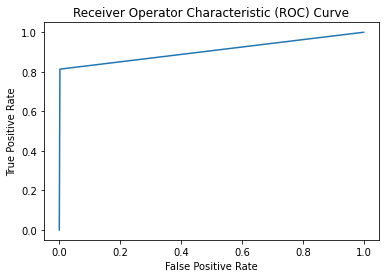

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, roc_curve
import matplotlib.pyplot as plt

# Let's fit the Naive Bayes model to our training data
nb = MultinomialNB()
# Fit model to training data
nb.fit(X_train, y_train)
# Predict on test data
y_preds = nb.predict(X_test)

print('Test accuracy with simple Naive Bayes:',accuracy_score(y_test,y_preds))
# We get a very good accuracy, despite class imbalance (recall 87% were Ham)


# # Plot the ROC curve  - we will cover this in more detail in the next few lectures! (not included in student version)
fpr, tpr, thresholds = roc_curve(y_test, y_preds, pos_label = 1)

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operator Characteristic (ROC) Curve')
plt.show()



That was a lot of content in a short period of time.

<br>

<br>

# __QUESTIONS?__